In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 목표
    - 개인 정보와 식습관으로 개인의 건강 이상을 예측하는 것이 목표

### 데이터 불러오기

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data Analysis/BDA 7기/Final 과제/데이터셋/2022 서울시 먹거리 통계 마이크로데이터/2022년 서울시 먹거리 통계 조사_마이크로데이터.xlsx",
                   engine = "openpyxl")
df

,IDX,구코드,SQ1,SQ2,SQ3,SQ3_1,A_SQ4B1,A_SQ4C1,A_SQ4D11,A_SQ4D12,...,DE4,DE4A,DE5,DE6,DE7,DE8,DE9,PSU,Strata_a,Strata_b
0,112,500,1,1,2,2,1,1,1955,5,...,1,NaN,2,3,3.0,1,1,5005103608,41.0,415
1,113,500,1,1,2,2,2,2,1958,10,...,2,NaN,2,5,NaN,1,1,5005103608,NaN,425
2,114,500,1,2,2,2,1,1,1986,11,...,3,5.0,2,1,1.0,4,5,5005103608,41.0,412
3,115,500,1,2,2,2,2,2,1987,6,...,3,4.0,2,1,1.0,4,5,5005103608,NaN,422
4,116,305,1,1,3,3,1,1,1973,5,...,3,5.0,3,3,3.0,4,3,3056250906,21.0,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,4200,410,2,1,3,2,2,2,1980,11,...,3,5.0,3,1,1.0,4,5,4107100806,NaN,323
3900,4201,650,4,1,2,2,2,2,1961,9,...,2,NaN,2,3,2.0,1,3,6506103905,NaN,525
3901,4202,650,4,1,2,2,1,1,1955,2,...,2,NaN,2,3,2.0,1,3,6506103905,54.0,515
3902,4203,650,2,2,1,1,1,2,1990,5,...,3,5.0,1,1,1.0,3,4,6506514003,52.0,522


- 컬럼이 매우 많으므로 관련이 있을 것 같은 일부 컬럼만 추출

In [ ]:
df_after = df[['A_SQ4C1', 'DE2', 'B6_1', 'B6_2',
               'Q1_1', 'Q1_2', 'Q1_3', 'Q1_total',
               'Q4',
               'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12',
               'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4',
               'Q15']]
df_after

,A_SQ4C1,DE2,B6_1,B6_2,Q1_1,Q1_2,Q1_3,Q1_total,Q4,Q6_1,...,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q15
0,1,5,167,60,7,7,7,21,5,1,...,8,9,8,8,3,2,3,1,3,7
1,2,5,158,60,7,7,7,21,5,8,...,4,5,6,4,3,2,2,1,2,7
2,1,2,174,70,5,7,7,19,1,3,...,5,8,7,4,5,2,3,3,4,7
3,2,2,160,55,5,7,7,19,1,4,...,3,5,4,3,5,2,3,2,2,6
4,1,3,181,90,0,7,7,14,6,3,...,5,6,4,4,5,5,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2,3,164,59,5,6,7,18,5,7,...,4,5,5,5,6,5,3,2,2,8
3900,2,5,162,59,3,7,5,15,5,5,...,5,7,7,7,4,3,3,2,1,8
3901,1,5,171,72,5,6,5,16,5,8,...,5,7,7,8,4,4,2,1,2,7
3902,2,2,165,55,5,6,3,14,5,7,...,7,6,7,8,7,4,3,3,2,7


- 보기 편하게 적절한 이름으로 컬럼명 대체

In [ ]:
df_after.columns = ['성별', '연령대', '키', '몸무게',
                    '아침', '점심', '저녁', '합계',
                    '채식육식여부',
                    '전곡류', '생채소류', '채소반찬류', '김치및장아찌류', '육류(구이,튀김)', '육류(찌개,국)', '가공육', '생선류', '달걀류', '콩류', '생과일류', '유제품',
                    '가당음료', '인스턴트면류', '패스트푸드', '주류',
                    '건강상태']
df_after

,성별,연령대,키,몸무게,아침,점심,저녁,합계,채식육식여부,전곡류,...,생선류,달걀류,콩류,생과일류,유제품,가당음료,인스턴트면류,패스트푸드,주류,건강상태
0,1,5,167,60,7,7,7,21,5,1,...,8,9,8,8,3,2,3,1,3,7
1,2,5,158,60,7,7,7,21,5,8,...,4,5,6,4,3,2,2,1,2,7
2,1,2,174,70,5,7,7,19,1,3,...,5,8,7,4,5,2,3,3,4,7
3,2,2,160,55,5,7,7,19,1,4,...,3,5,4,3,5,2,3,2,2,6
4,1,3,181,90,0,7,7,14,6,3,...,5,6,4,4,5,5,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2,3,164,59,5,6,7,18,5,7,...,4,5,5,5,6,5,3,2,2,8
3900,2,5,162,59,3,7,5,15,5,5,...,5,7,7,7,4,3,3,2,1,8
3901,1,5,171,72,5,6,5,16,5,8,...,5,7,7,8,4,4,2,1,2,7
3902,2,2,165,55,5,6,3,14,5,7,...,7,6,7,8,7,4,3,3,2,7


컬럼 설명

- 성별:
    - 1: 남자
    - 2: 여자
- 연령대:
    - 1: 만 18~29세
    - 2: 30대
    - 3: 40대
    - 4: 50대
    - 5: 60대
    - 6: 70대 이상
- 아침, 점심, 저녁, 합계: 일주일 간 식사 횟수
- 채식육식여부:
    - 1: 모든 동물성 식품을 먹지 않음
    - 2: 유제품과 난류를 제외한 동물성 식품을 먹지 않음
    - 3: 붉은 고기만 먹지 않음
    - 4: 기본적으로 모든 동물성 식품을 먹지 않지만, 상황에 따라서 동물성 식품을 먹음
    - 5: 식물, 동물성 식품 모두 먹음
    - 6: 되도록 동물성 식품 먹음
- 전곡류 ~ 유제품
    - 1: 월 1회 미만
    - 2: 월 1회
    - 3: 월 2~3회
    - 4: 주 1~2회
    - 5: 주 3~4회
    - 6: 주 5~6회
    - 7: 일 1회
    - 8: 일 2회
    - 9: 일 3회 이상
- 가당음료 ~ 주류
    - 1: 거의 안 먹음
    - 2: 월 1~3회 정도
    - 3: 주 1~2회 정도
    - 4: 주 3~6회 정도
    - 5: 매일 1회 이상



### 결측치 확인

In [ ]:
df_after.isnull().sum()

성별           0
연령대          0
키            0
몸무게          0
아침           0
점심           0
저녁           0
합계           0
채식육식여부       0
전곡류          0
생채소류         0
채소반찬류        0
김치및장아찌류      0
육류(구이,튀김)    0
육류(찌개,국)     0
가공육          0
생선류          0
달걀류          0
콩류           0
생과일류         0
유제품          0
가당음료         0
인스턴트면류       0
패스트푸드        0
주류           0
건강상태         0
dtype: int64

- 결측치는 없다

### target 컬럼 확인

- 한글 폰트가 깨지므로 다음 코드를 실행

In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어 있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트 설정

<Axes: xlabel='건강상태', ylabel='count'>

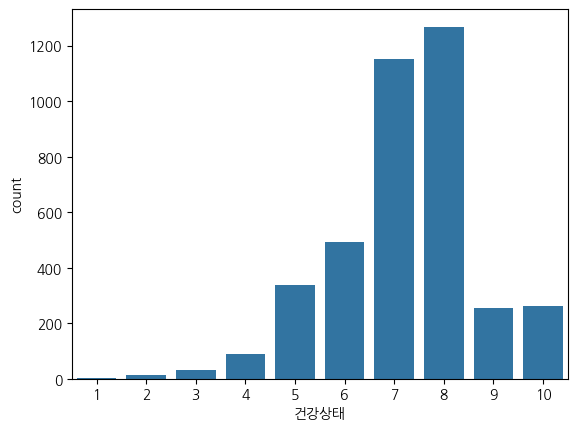

In [ ]:
sns.countplot(x='건강상태', data=df_after)

- 0점은 아무도 답하지 않았음을 알 수 있고, 1~10 범위에서 절반을 기준으로 나눌 것이므로,
- 5점 이하와 6점 이상으로 구분할 것이다.
- 건강 이상을 탐지하는 것이 목표이므로 5점 이하를 1로, 6점 이상을 0으로 설정

In [ ]:
df_after['건강이상여부'] = [1 if x <= 5 else 0 for x in df_after['건강상태']]
df_after.drop(columns=['건강상태'], inplace=True)
df_after

<ipython-input-202-3f3a6fe15c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['건강이상여부'] = [1 if x <= 5 else 0 for x in df_after['건강상태']]
<ipython-input-202-3f3a6fe15c38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after.drop(columns=['건강상태'], inplace=True)


,성별,연령대,키,몸무게,아침,점심,저녁,합계,채식육식여부,전곡류,...,생선류,달걀류,콩류,생과일류,유제품,가당음료,인스턴트면류,패스트푸드,주류,건강이상여부
0,1,5,167,60,7,7,7,21,5,1,...,8,9,8,8,3,2,3,1,3,0
1,2,5,158,60,7,7,7,21,5,8,...,4,5,6,4,3,2,2,1,2,0
2,1,2,174,70,5,7,7,19,1,3,...,5,8,7,4,5,2,3,3,4,0
3,2,2,160,55,5,7,7,19,1,4,...,3,5,4,3,5,2,3,2,2,0
4,1,3,181,90,0,7,7,14,6,3,...,5,6,4,4,5,5,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2,3,164,59,5,6,7,18,5,7,...,4,5,5,5,6,5,3,2,2,0
3900,2,5,162,59,3,7,5,15,5,5,...,5,7,7,7,4,3,3,2,1,0
3901,1,5,171,72,5,6,5,16,5,8,...,5,7,7,8,4,4,2,1,2,0
3902,2,2,165,55,5,6,3,14,5,7,...,7,6,7,8,7,4,3,3,2,0


<Axes: xlabel='건강이상여부', ylabel='count'>

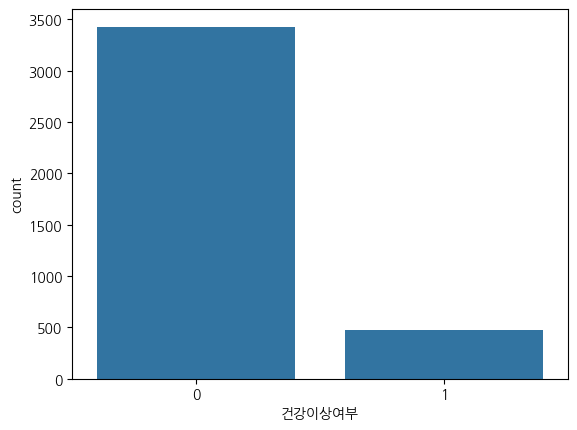

In [ ]:
sns.countplot(x='건강이상여부', data=df_after)

### 추가적 데이터 전처리

- 성별은 남성: 0, 여성: 1로 설정한다.
- 키와 몸무게를 이용해 BMI를 만들고, 키와 몸무게는 지운다.

In [ ]:
df_final = df_after.copy()
df_final['성별'] = df_final['성별'].apply(lambda x: 0 if x == 1 else 1)
df_final['BMI'] = df_final['몸무게'] / ((df_final['키'] / 100) ** 2)
df_final.drop(columns=['키', '몸무게'], inplace=True)
df_final

,성별,연령대,아침,점심,저녁,합계,채식육식여부,전곡류,생채소류,채소반찬류,...,달걀류,콩류,생과일류,유제품,가당음료,인스턴트면류,패스트푸드,주류,건강이상여부,BMI
0,0,5,7,7,7,21,5,1,9,9,...,9,8,8,3,2,3,1,3,0,21.513859
1,1,5,7,7,7,21,5,8,8,9,...,5,6,4,3,2,2,1,2,0,24.034610
2,0,2,5,7,7,19,1,3,5,5,...,8,7,4,5,2,3,3,4,0,23.120624
3,1,2,5,7,7,19,1,4,5,3,...,5,4,3,5,2,3,2,2,0,21.484375
4,0,3,0,7,7,14,6,3,1,2,...,6,4,4,5,5,4,3,3,1,27.471689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,1,3,5,6,7,18,5,7,7,8,...,5,5,5,6,5,3,2,2,0,21.936347
3900,1,5,3,7,5,15,5,5,8,7,...,7,7,7,4,3,3,2,1,0,22.481329
3901,0,5,5,6,5,16,5,8,7,6,...,7,7,8,4,4,2,1,2,0,24.622961
3902,1,2,5,6,3,14,5,7,8,7,...,6,7,8,7,4,3,3,2,0,20.202020


### 가설 설정

1. 가당음료, 인스턴트면류, 패스트푸드, 주류 소비량이 많을수록 건강이 나쁠 것이다.
2. 연령대가 높을수록 건강이 나쁠 것이다.
3. BMI가 18.5 미만인 저체중, 25 이상인 비만은 정상 체중에 비해 건강이 나쁠 것이다.

### 가설 확인

#### 1번

##### 가당음료

In [ ]:
df_final.groupby('가당음료')['건강이상여부'].mean()

가당음료
1    0.185811
2    0.126562
3    0.128177
4    0.080834
5    0.125000
Name: 건강이상여부, dtype: float64

<Axes: xlabel='가당음료', ylabel='건강이상여부'>

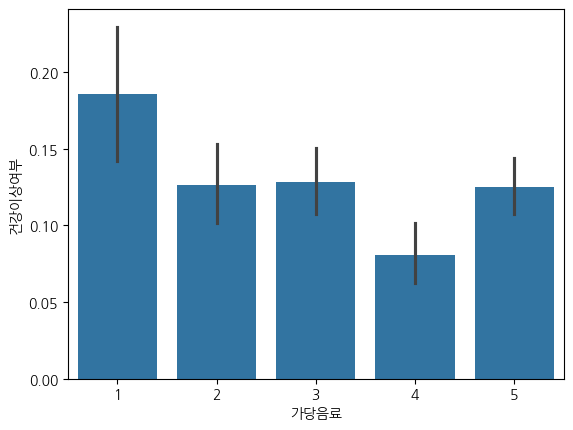

In [ ]:
sns.barplot(x='가당음료', y='건강이상여부', data=df_final)

##### 인스턴트면류

In [ ]:
df_final.groupby('인스턴트면류')['건강이상여부'].mean()

인스턴트면류
1    0.268714
2    0.119701
3    0.078394
4    0.084656
5    0.238095
Name: 건강이상여부, dtype: float64

<Axes: xlabel='인스턴트면류', ylabel='건강이상여부'>

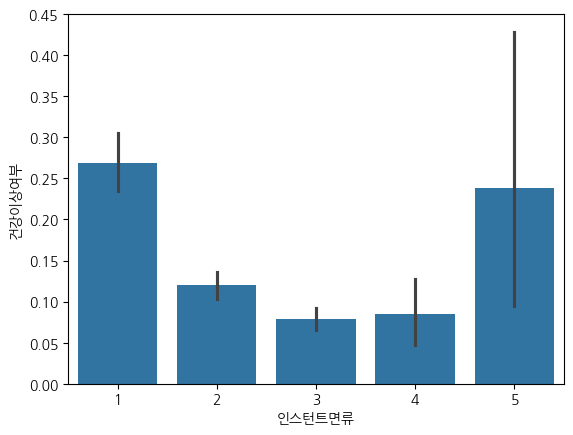

In [ ]:
sns.barplot(x='인스턴트면류', y='건강이상여부', data=df_final)

##### 패스트푸드

In [ ]:
df_final.groupby('패스트푸드')['건강이상여부'].mean()

패스트푸드
1    0.186143
2    0.102062
3    0.082209
4    0.163743
5    0.272727
Name: 건강이상여부, dtype: float64

<Axes: xlabel='패스트푸드', ylabel='건강이상여부'>

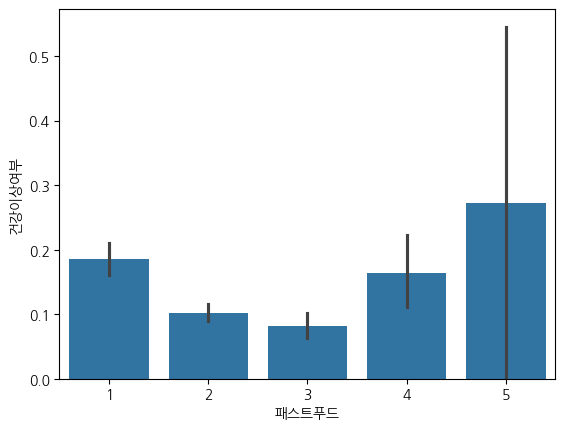

In [ ]:
sns.barplot(x='패스트푸드', y='건강이상여부', data=df_final)

##### 주류

In [ ]:
df_final.groupby('주류')['건강이상여부'].mean()

주류
1    0.216125
2    0.101749
3    0.077770
4    0.115819
5    0.222222
Name: 건강이상여부, dtype: float64

<Axes: xlabel='주류', ylabel='건강이상여부'>

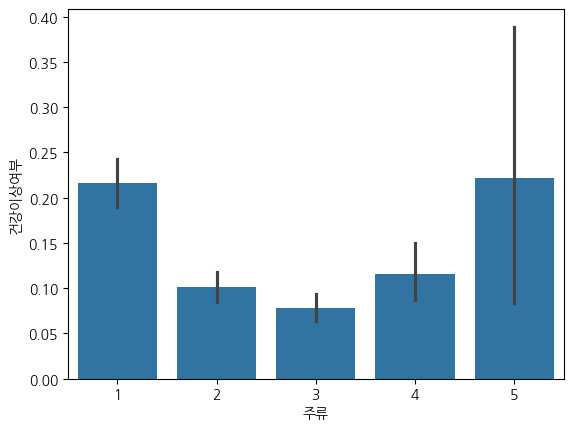

In [ ]:
sns.barplot(x='주류', y='건강이상여부', data=df_final)

결론
- 전반적으로 그런 경향이 드러나지 않았다.
- 적절한 빈도로 먹는 것이 그렇지 않은 것보다 건강 이상이 낮은 것으로 보인다.

#### 2번

In [ ]:
df_final.groupby('연령대')['건강이상여부'].mean()

연령대
1    0.052632
2    0.048714
3    0.052696
4    0.123583
5    0.197917
6    0.470588
Name: 건강이상여부, dtype: float64

<Axes: xlabel='연령대', ylabel='건강이상여부'>

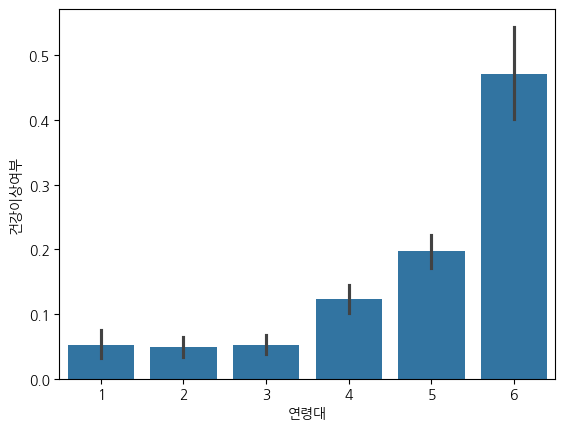

In [ ]:
sns.barplot(x='연령대', y='건강이상여부', data=df_final)

결론
- 확실히 고연령으로 갈수록 건강 이상이 많이 나타나는 것으로 보인다.

#### 3번

In [ ]:
df_final['저체중'] = df_final['BMI'].apply(lambda x: 1 if x < 18.5 else 0)
df_final['비만'] = df_final['BMI'].apply(lambda x: 1 if x >= 25 else 0)
df_final['비만도'] = df_final['BMI'].apply(lambda x: '저체중' if x < 18.5 else ('비만' if x >= 25 else '정상'))
df_final

,성별,연령대,아침,점심,저녁,합계,채식육식여부,전곡류,생채소류,채소반찬류,...,유제품,가당음료,인스턴트면류,패스트푸드,주류,건강이상여부,BMI,저체중,비만,비만도
0,0,5,7,7,7,21,5,1,9,9,...,3,2,3,1,3,0,21.513859,0,0,정상
1,1,5,7,7,7,21,5,8,8,9,...,3,2,2,1,2,0,24.034610,0,0,정상
2,0,2,5,7,7,19,1,3,5,5,...,5,2,3,3,4,0,23.120624,0,0,정상
3,1,2,5,7,7,19,1,4,5,3,...,5,2,3,2,2,0,21.484375,0,0,정상
4,0,3,0,7,7,14,6,3,1,2,...,5,5,4,3,3,1,27.471689,0,1,비만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,1,3,5,6,7,18,5,7,7,8,...,6,5,3,2,2,0,21.936347,0,0,정상
3900,1,5,3,7,5,15,5,5,8,7,...,4,3,3,2,1,0,22.481329,0,0,정상
3901,0,5,5,6,5,16,5,8,7,6,...,4,4,2,1,2,0,24.622961,0,0,정상
3902,1,2,5,6,3,14,5,7,8,7,...,7,4,3,3,2,0,20.202020,0,0,정상


In [ ]:
df_final.groupby('비만도')['건강이상여부'].mean()

비만도
비만     0.192941
저체중    0.168224
정상     0.111507
Name: 건강이상여부, dtype: float64

<Axes: xlabel='비만도', ylabel='건강이상여부'>

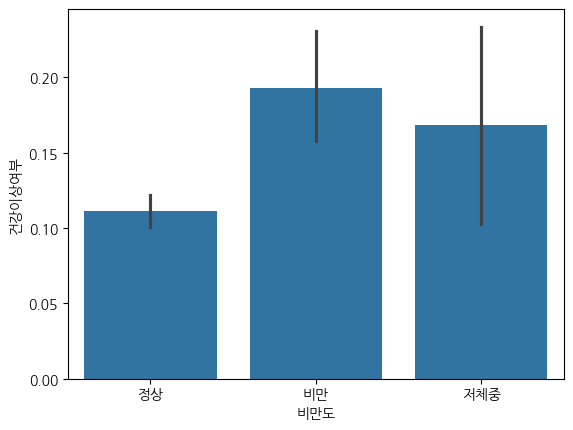

In [ ]:
sns.barplot(x='비만도', y='건강이상여부', data=df_final)

결론
- 정상일 때가 가장 건강 이상 비율이 낮다.

In [ ]:
df_final.drop('비만도', axis=1, inplace=True)
df_final

,성별,연령대,아침,점심,저녁,합계,채식육식여부,전곡류,생채소류,채소반찬류,...,생과일류,유제품,가당음료,인스턴트면류,패스트푸드,주류,건강이상여부,BMI,저체중,비만
0,0,5,7,7,7,21,5,1,9,9,...,8,3,2,3,1,3,0,21.513859,0,0
1,1,5,7,7,7,21,5,8,8,9,...,4,3,2,2,1,2,0,24.034610,0,0
2,0,2,5,7,7,19,1,3,5,5,...,4,5,2,3,3,4,0,23.120624,0,0
3,1,2,5,7,7,19,1,4,5,3,...,3,5,2,3,2,2,0,21.484375,0,0
4,0,3,0,7,7,14,6,3,1,2,...,4,5,5,4,3,3,1,27.471689,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,1,3,5,6,7,18,5,7,7,8,...,5,6,5,3,2,2,0,21.936347,0,0
3900,1,5,3,7,5,15,5,5,8,7,...,7,4,3,3,2,1,0,22.481329,0,0
3901,0,5,5,6,5,16,5,8,7,6,...,8,4,4,2,1,2,0,24.622961,0,0
3902,1,2,5,6,3,14,5,7,8,7,...,8,7,4,3,3,2,0,20.202020,0,0


### 시각화

#### 성별

<Axes: xlabel='성별', ylabel='건강이상여부'>

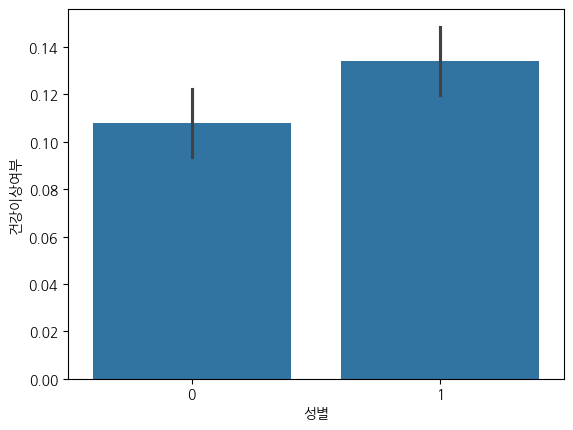

In [ ]:
sns.barplot(x='성별', y='건강이상여부', data=df_final)

- 여성이 상대적으로 건강 이상이 높게 나오는 것으로 확인되었다.

#### 아침, 점심, 저녁, 합계

<Axes: xlabel='아침', ylabel='건강이상여부'>

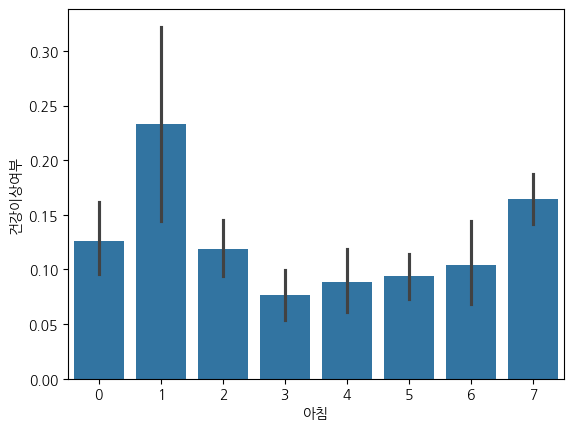

In [ ]:
sns.barplot(x='아침', y='건강이상여부', data=df_final)

<Axes: xlabel='점심', ylabel='건강이상여부'>

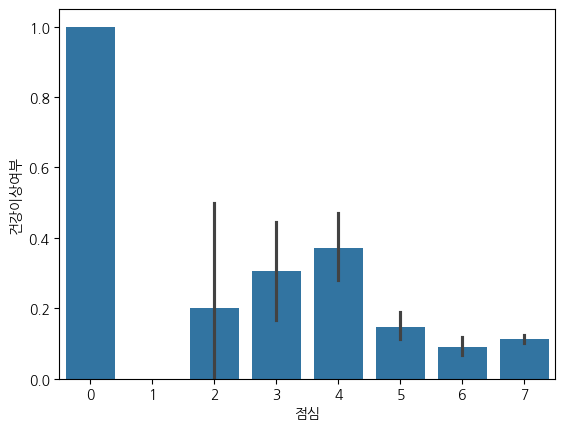

In [ ]:
sns.barplot(x='점심', y='건강이상여부', data=df_final)

<Axes: xlabel='저녁', ylabel='건강이상여부'>

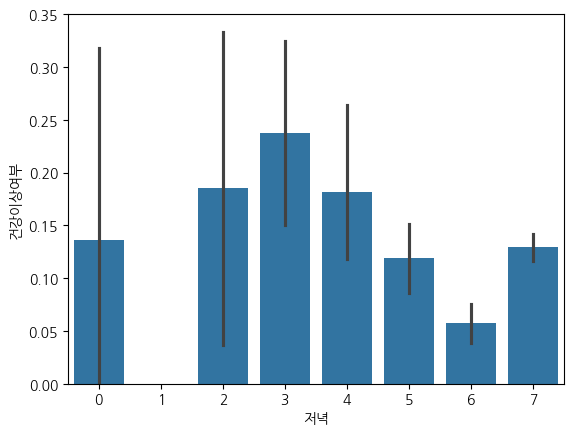

In [ ]:
sns.barplot(x='저녁', y='건강이상여부', data=df_final)

<Axes: xlabel='합계', ylabel='건강이상여부'>

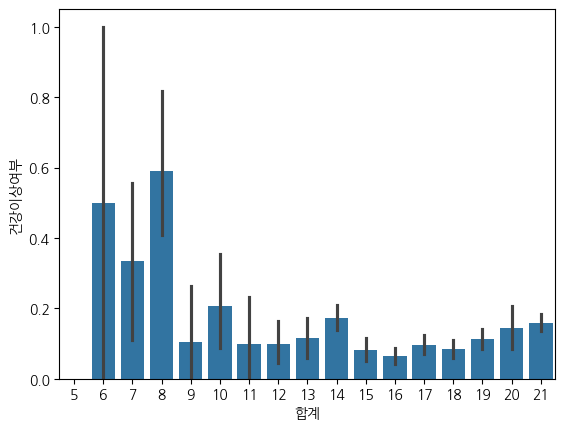

In [ ]:
sns.barplot(x='합계', y='건강이상여부', data=df_final)

- 개별 아침, 점심, 저녁에서는 특징을 발견하기 어렵다
- 식사 횟수 합계에서 8회 이하 구간에서는 건강 이상 비율이 높아짐을 확인하였다.
- 다만, 일부는 해당하는 도수가 적어서 신뢰구간이 매우 넓은 모습을 보인다.

#### 채식, 육식 여부

<Axes: xlabel='채식육식여부', ylabel='건강이상여부'>

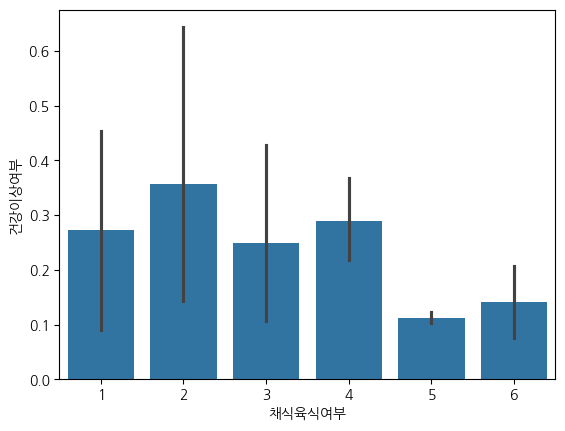

In [ ]:
sns.barplot(x='채식육식여부', y='건강이상여부', data=df_final)

- 전반적으로 채식이 육식보다 건강 이상 비율이 높다

#### 전곡류 ~ 유제품

<Axes: xlabel='전곡류', ylabel='건강이상여부'>

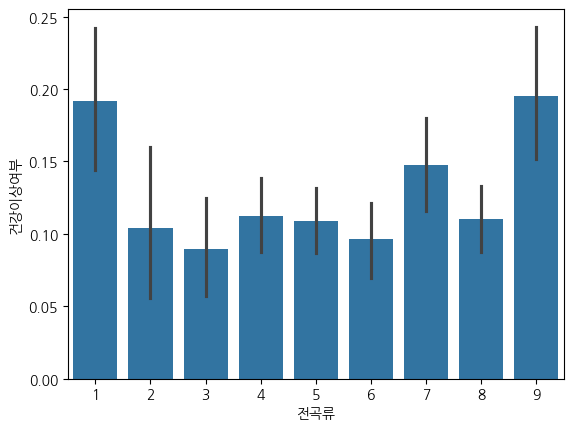

In [ ]:
sns.barplot(x='전곡류', y='건강이상여부', data=df_final)

<Axes: xlabel='생채소류', ylabel='건강이상여부'>

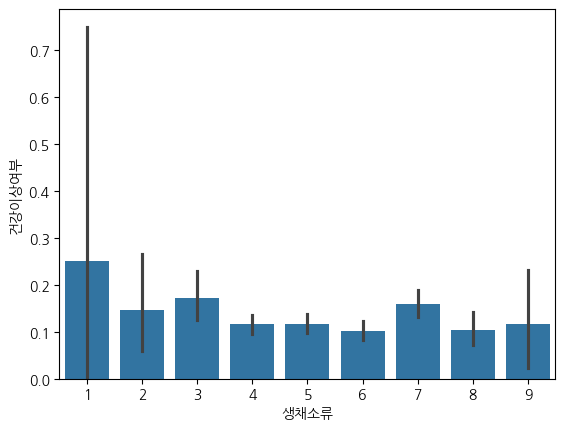

In [ ]:
sns.barplot(x='생채소류', y='건강이상여부', data=df_final)

<Axes: xlabel='채소반찬류', ylabel='건강이상여부'>

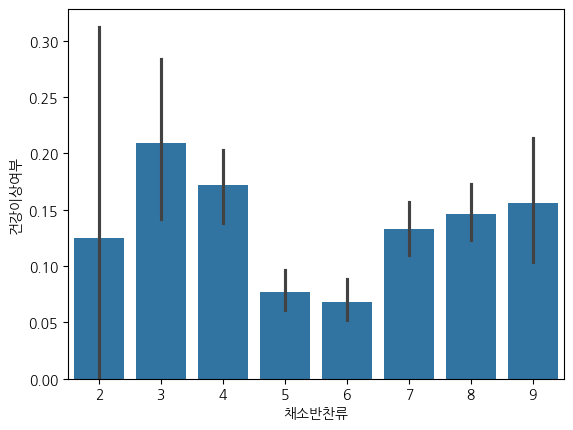

In [ ]:
sns.barplot(x='채소반찬류', y='건강이상여부', data=df_final)

<Axes: xlabel='김치및장아찌류', ylabel='건강이상여부'>

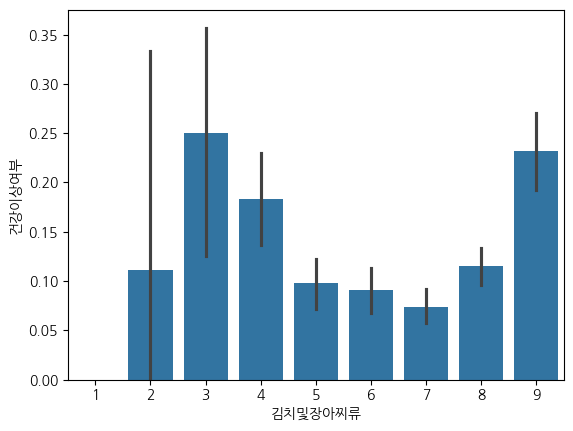

In [ ]:
sns.barplot(x='김치및장아찌류', y='건강이상여부', data=df_final)

<Axes: xlabel='육류(구이,튀김)', ylabel='건강이상여부'>

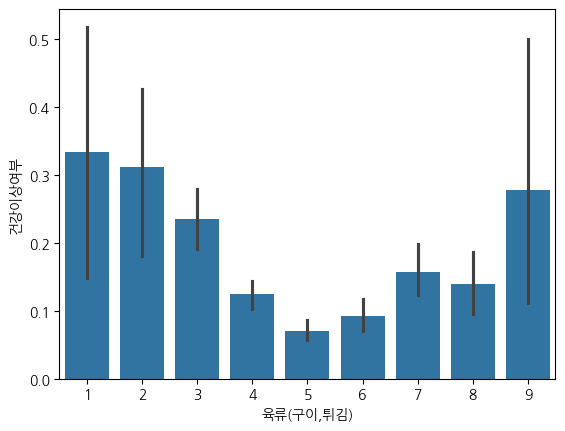

In [ ]:
sns.barplot(x='육류(구이,튀김)', y='건강이상여부', data=df_final)

<Axes: xlabel='육류(찌개,국)', ylabel='건강이상여부'>

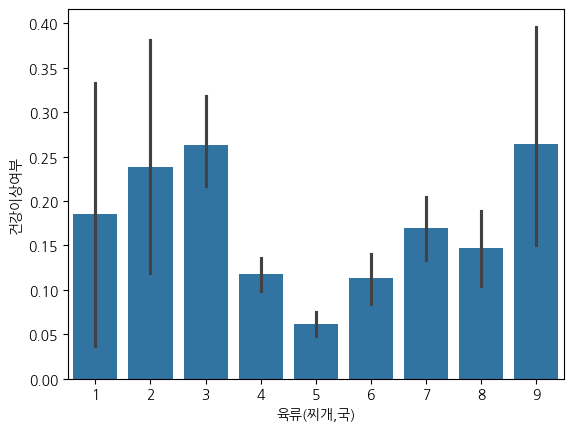

In [ ]:
sns.barplot(x='육류(찌개,국)', y='건강이상여부', data=df_final)

<Axes: xlabel='가공육', ylabel='건강이상여부'>

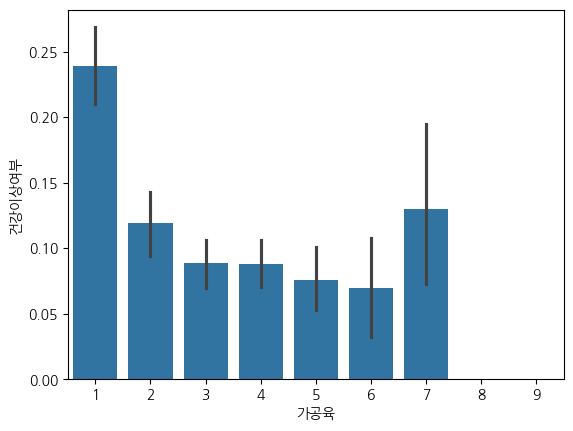

In [ ]:
sns.barplot(x='가공육', y='건강이상여부', data=df_final)

<Axes: xlabel='생선류', ylabel='건강이상여부'>

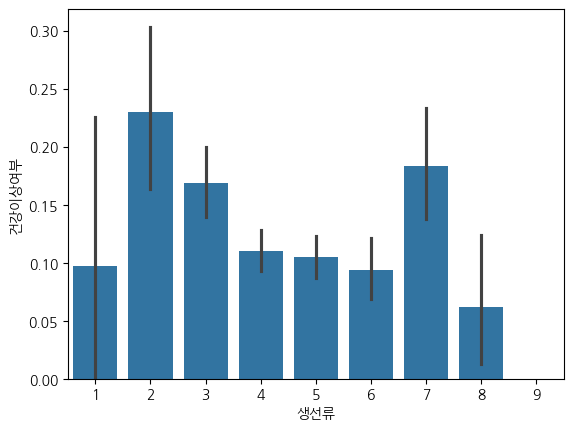

In [ ]:
sns.barplot(x='생선류', y='건강이상여부', data=df_final)

<Axes: xlabel='달걀류', ylabel='건강이상여부'>

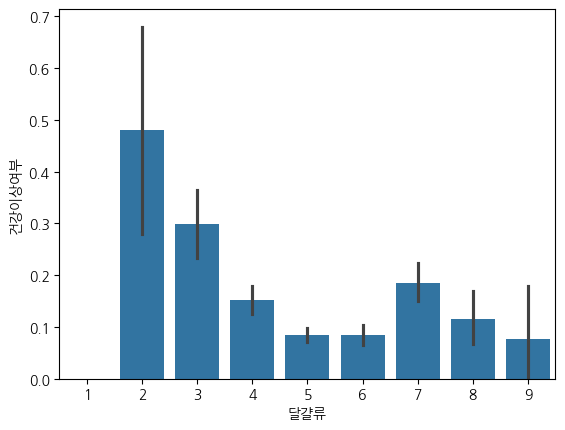

In [ ]:
sns.barplot(x='달걀류', y='건강이상여부', data=df_final)

<Axes: xlabel='콩류', ylabel='건강이상여부'>

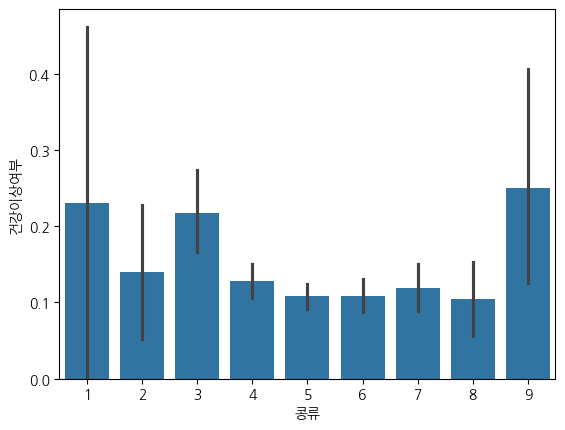

In [ ]:
sns.barplot(x='콩류', y='건강이상여부', data=df_final)

<Axes: xlabel='생과일류', ylabel='건강이상여부'>

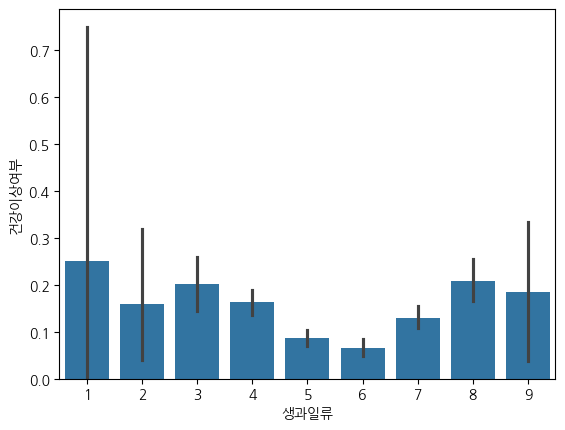

In [ ]:
sns.barplot(x='생과일류', y='건강이상여부', data=df_final)

<Axes: xlabel='유제품', ylabel='건강이상여부'>

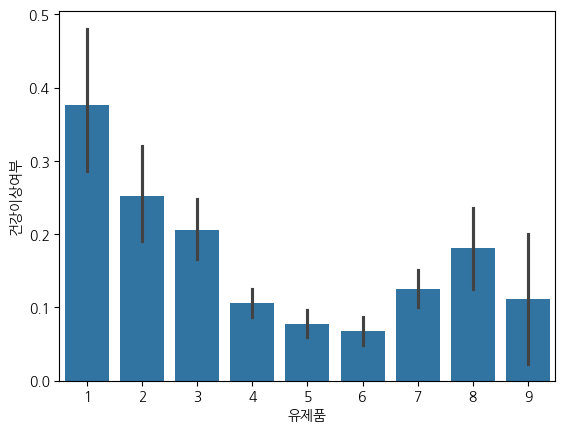

In [ ]:
sns.barplot(x='유제품', y='건강이상여부', data=df_final)

- 전반적으로 보았을 때, 거의 안 먹거나 너무 자주 먹는 것보다는 적당한 빈도로 먹는 것이 건강 이상 빈도가 낮음을 확인하였다.

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df_final.drop('건강이상여부', axis=1)
y = df_final['건강이상여부']

In [ ]:
X

,성별,연령대,아침,점심,저녁,합계,채식육식여부,전곡류,생채소류,채소반찬류,...,콩류,생과일류,유제품,가당음료,인스턴트면류,패스트푸드,주류,BMI,저체중,비만
0,0,5,7,7,7,21,5,1,9,9,...,8,8,3,2,3,1,3,21.513859,0,0
1,1,5,7,7,7,21,5,8,8,9,...,6,4,3,2,2,1,2,24.034610,0,0
2,0,2,5,7,7,19,1,3,5,5,...,7,4,5,2,3,3,4,23.120624,0,0
3,1,2,5,7,7,19,1,4,5,3,...,4,3,5,2,3,2,2,21.484375,0,0
4,0,3,0,7,7,14,6,3,1,2,...,4,4,5,5,4,3,3,27.471689,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,1,3,5,6,7,18,5,7,7,8,...,5,5,6,5,3,2,2,21.936347,0,0
3900,1,5,3,7,5,15,5,5,8,7,...,7,7,4,3,3,2,1,22.481329,0,0
3901,0,5,5,6,5,16,5,8,7,6,...,7,8,4,4,2,1,2,24.622961,0,0
3902,1,2,5,6,3,14,5,7,8,7,...,7,8,7,4,3,3,2,20.202020,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

- 데이터 샘플이 불균형한데, 언더샘플링은 데이터 손실 위험성이 있으므로 오버샘플링을 실시한다.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

print(Counter(y_train_sm))

Counter({0: 2399, 1: 2399})


In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [ ]:
pred = rf_clf.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1029
           1       0.49      0.41      0.44       143

    accuracy                           0.88      1172
   macro avg       0.70      0.67      0.69      1172
weighted avg       0.87      0.88      0.87      1172

[[968  61]
 [ 85  58]]


- 튜닝

GridSearchCV를 사용하지 않고 수작업으로 튜닝하였다.

In [ ]:
rf_clf_final = RandomForestClassifier(max_depth=12, random_state=42)
rf_clf_final.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=12, random_state=42)

In [ ]:
pred_final = rf_clf_final.predict(X_test)

print(classification_report(y_test, pred_final))
print(confusion_matrix(y_test, pred_final))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1029
           1       0.47      0.47      0.47       143

    accuracy                           0.87      1172
   macro avg       0.70      0.70      0.70      1172
weighted avg       0.87      0.87      0.87      1172

[[953  76]
 [ 76  67]]


In [ ]:
print(rf_clf_final.feature_importances_, '\n')

series = pd.Series(rf_clf_final.feature_importances_, index=X_train.columns)

top15 = series.sort_values(ascending=False)[:15]
print(top15)

[0.01731658 0.07673451 0.0400455  0.02048573 0.01685866 0.03715415
 0.01022404 0.04648323 0.03342238 0.03924882 0.03458676 0.04931982
 0.04396404 0.07057379 0.02819249 0.04179724 0.0287191  0.05161149
 0.06014179 0.03147142 0.07228513 0.03127624 0.04923703 0.0619529
 0.00180228 0.0050949 ] 

연령대          0.076735
인스턴트면류       0.072285
가공육          0.070574
BMI          0.061953
유제품          0.060142
생과일류         0.051611
육류(구이,튀김)    0.049320
주류           0.049237
전곡류          0.046483
육류(찌개,국)     0.043964
달걀류          0.041797
아침           0.040045
채소반찬류        0.039249
합계           0.037154
김치및장아찌류      0.034587
dtype: float64


<Axes: title={'center': 'Feature Importances Top 15'}, xlabel='None', ylabel='None'>

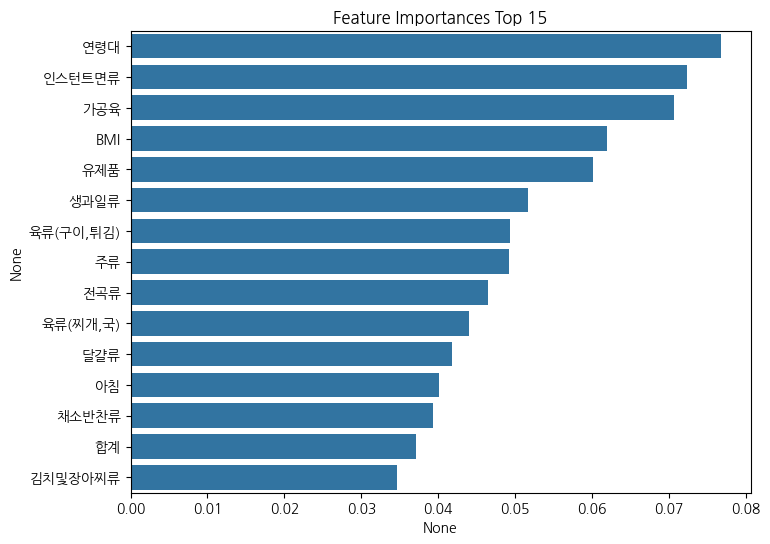

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)

- 확실히 연령대가 분류에 있어서 중요도가 가장 큰 것으로 드러났다.

- 실제 내 데이터를 넣어서 확인

In [ ]:
rf_clf_final.predict([[0, 1,
                      3, 7, 7, 17,
                      5,
                      4, 3, 3, 1, 5, 5, 5, 1, 1, 2, 4, 2,
                      7, 4, 6, 2,
                      22.98, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])